In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
map = gpd.read_file('../data/AgrImOnIa/raw/Comuni_correnti_poligonali.shp')
map = map.to_crs({'init': 'epsg:4326'})
map.head()

C:\Users\camil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,OBJECTID,CLASSREF,BELFIORE,COD_ISTATN,NOME_COM,COD_PRO,NOME_PRO,SIG_PRO,COD_CMO,NOME_CMO,...,ANNO,ISTAT,LEGGE_ISTI,ATS_COD,ATS_DEC,CMETR_COD,CMETR_DEC,SHAPE_AREA,SHAPE_LEN,geometry
0,58,2ec835aa-55fd-4157-a4ef-9762bf1c4eac,A533,03016017,AZZONE,16,BERGAMO,BG,ZO09,VALLE DI SCALVE,...,1980,16017,None,030325,ATS DI BERGAMO,None,None,1.731573e+07,22193.780488,"POLYGON ((10.11432 45.93747, 10.11393 45.93752..."
1,63,93c3bba6-7115-4e4e-8426-a8752b94d9ee,I894,03018152,SPESSA,18,PAVIA,PV,None,None,...,1980,18152,None,030328,ATS DI PAVIA,None,None,1.236544e+07,16260.447426,"POLYGON ((9.36064 45.13149, 9.36010 45.12986, ..."
2,70,ade53e93-78e7-4990-b979-88de73da9ea1,D660,03098026,FOMBIO,98,LODI,LO,None,None,...,1980,98026,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,None,None,7.456725e+06,19279.664351,"POLYGON ((9.70211 45.14260, 9.70212 45.14259, ..."
3,71,d2fa448d-1769-4d7e-8189-1e78981391f3,G388,03018110,PAVIA,18,PAVIA,PV,None,None,...,2012,18110,None,030328,ATS DI PAVIA,None,None,6.323801e+07,47660.027322,"POLYGON ((9.20950 45.22094, 9.20963 45.22098, ..."
4,72,6c49be44-c6c3-497f-8dcb-2f4b5c8f9753,L788,03018175,VERRUA PO,18,PAVIA,PV,None,None,...,1980,18175,None,030328,ATS DI PAVIA,None,None,1.083022e+07,18259.383988,"POLYGON ((9.16910 45.13717, 9.17490 45.13226, ..."


In [17]:
input_file_name = "../data/formated_input_data.csv"
input_data = gpd.read_file(input_file_name)
input_data.head()

# Replace in all names ' for `
input_data['Municipality_Name'] = input_data['Municipality_Name'].str.replace('\'', '`')

In [18]:
geometry_cols = map[["NOME_COM", "geometry"]]
merged_df = pd.merge(input_data, geometry_cols, left_on="Municipality_Name", right_on="NOME_COM", how="inner")
merged_df.drop(["NOME_COM", "geometry_x"], axis=1, inplace=True)
merged_df.rename(columns={"geometry_y": "geometry"}, inplace=True)

# shift back the predictions by the initial value
mean_shift = pd.to_numeric(merged_df["PM25_original"], errors="coerce").mean()

merged_df.head()

,PM25_original,Altitude,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_tot_precipitation,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,...,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LA_hvi,LA_lvi,LA_land_use,Municipality_Name,geometry
0,NA,1292.89141657699,0.507891622073711,0.904455072699525,1.4152508270229,0.00367039898815911,86566.704254015,6013509.45327462,57.8006478953149,76.2070771750899,...,0.225870799049641,0.53458634005164,0.17354998233046,5.33730728436766,9.39397596196961,3.61700151088678,1.76140057573456,312.001306572391,AZZONE,"POLYGON ((10.11432 45.93747, 10.11393 45.93752..."
1,NA,64.306792678833,8.10165141509434,1.75944622641509,2.85168867924528,0.00238024121839623,100553.20754717,7525241.98113208,60.3552830188679,78.7467452830189,...,0.741664622641509,1.98616509433962,0.578762735849057,445.093396226415,17.2808490566038,1.26363679245283,1.48933490566038,213,SPESSA,"POLYGON ((9.36064 45.13149, 9.36010 45.12986, ..."
2,NA,55.7899148276466,8.13273275573325,1.66456250939245,2.76145564321898,0.00249699580661753,100807.926502272,7533993.27608376,62.6115602537683,80.2461530228045,...,3.39985007556022,5.51335021537457,0.879030737426578,478.912944893763,90.0845827785372,1.94024613614573,1.7539291951971,211,FOMBIO,"POLYGON ((9.70211 45.14260, 9.70212 45.14259, ..."
3,22.9765868886576,73.9744487857422,8.05834433689409,1.68968722952174,2.78532769492089,0.0024949640964014,100509.327508467,7502914.2202497,59.10553820706,78.0219759937223,...,2.33864188688461,5.65430582117368,1.05929452541504,50.3011204469232,22.9944811757548,0.830585209614181,1.13850487194332,211.91886205271,PAVIA,"POLYGON ((9.20950 45.22094, 9.20963 45.22098, ..."
4,NA,68.0622571107931,8.10130706336173,1.69378918251854,2.79323789075377,0.00237898708335693,100433.446103245,7515987.49759647,59.1773525145777,77.9319838533934,...,2.77002949474788,5.8527351798232,1.08430001339182,35.5657079490195,12.4886064222933,1.33876146403797,1.20101804201036,211,VERRUA PO,"POLYGON ((9.16910 45.13717, 9.17490 45.13226, ..."


<Axes: >

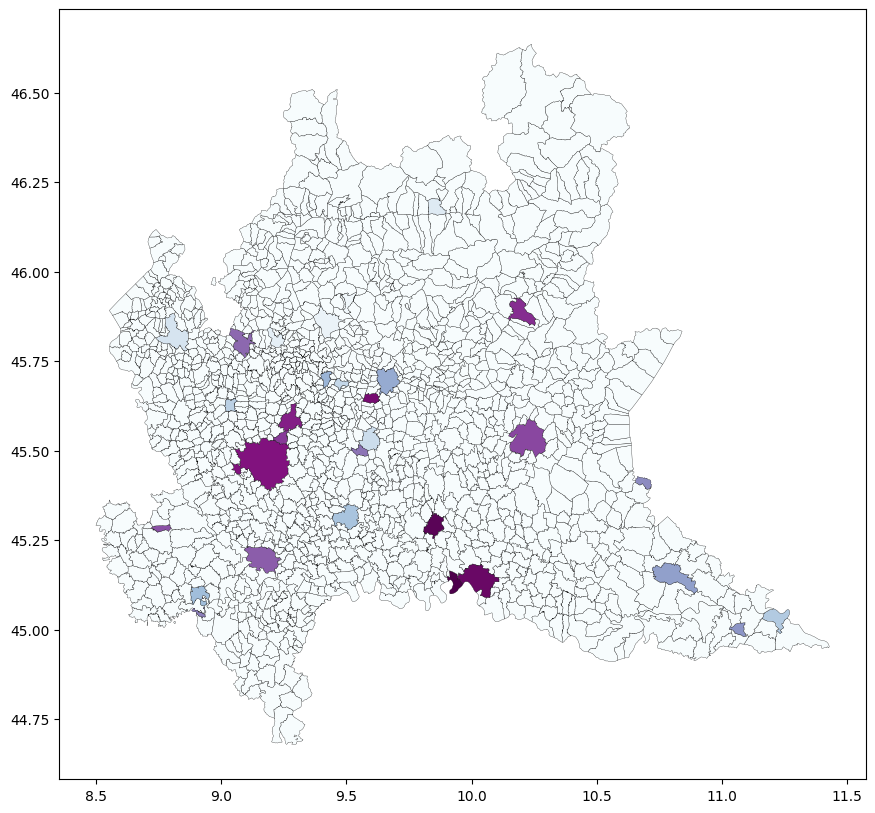

In [19]:
merged_df = merged_df.to_crs(map.crs)
cleaned_df = merged_df
cleaned_df["PM25_original"].replace("NA", 0, inplace=True)

fig, ax = plt.subplots(figsize=(15, 10))

cleaned_df.plot(
    ax=ax, 
    column="PM25_original", 
    cmap="BuPu", 
    edgecolor='black', 
    linewidth=0.2
)

<Axes: >

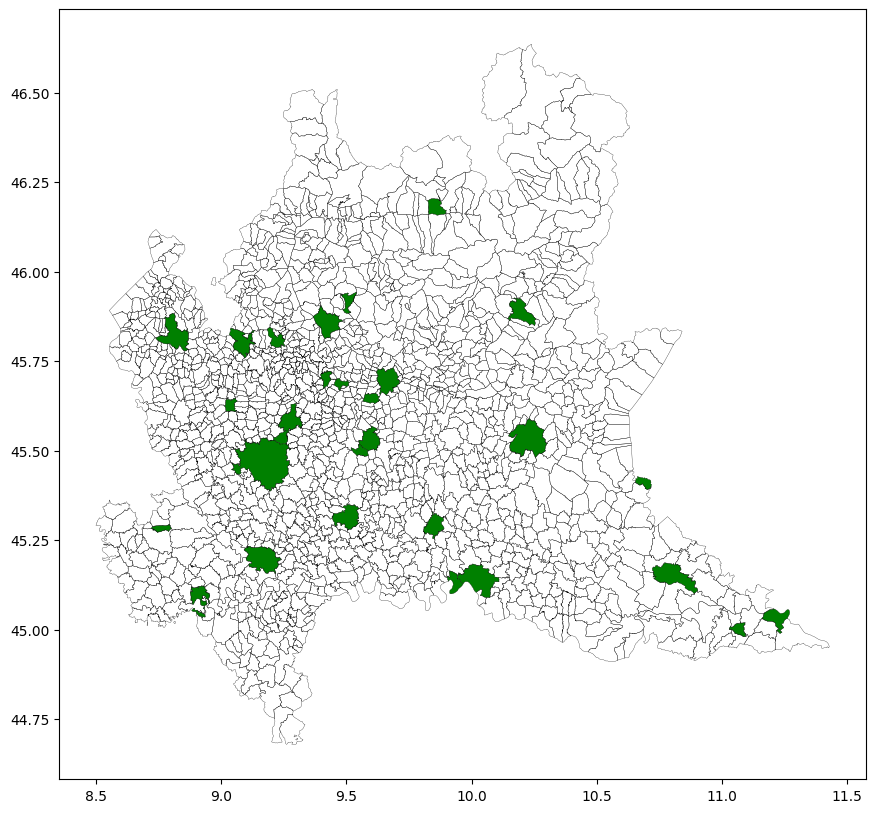

In [20]:
# Create a new column for color
cleaned_df['color'] = np.where(cleaned_df['PM25_original'] != 0, 'green', 'none')

fig, ax = plt.subplots(figsize=(15, 10))

# Plot the data
cleaned_df.plot(
    ax=ax, 
    color=cleaned_df['color'], 
    edgecolor='black', 
    linewidth=0.2
)